In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt,ExponentialSmoothing,SimpleExpSmoothing


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('D:\DATA SCIENCE\ASSIGNMENT\QUESTION\FORECASTING\CocaCola_Sales_Rawdata.csv')

In [5]:
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<Axes: >

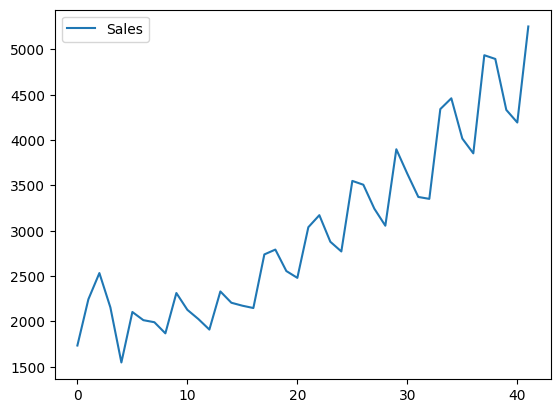

In [6]:
data.plot()

<Figure size 1000x400 with 0 Axes>

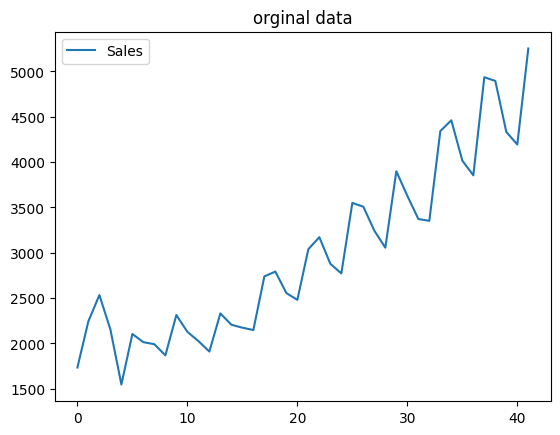

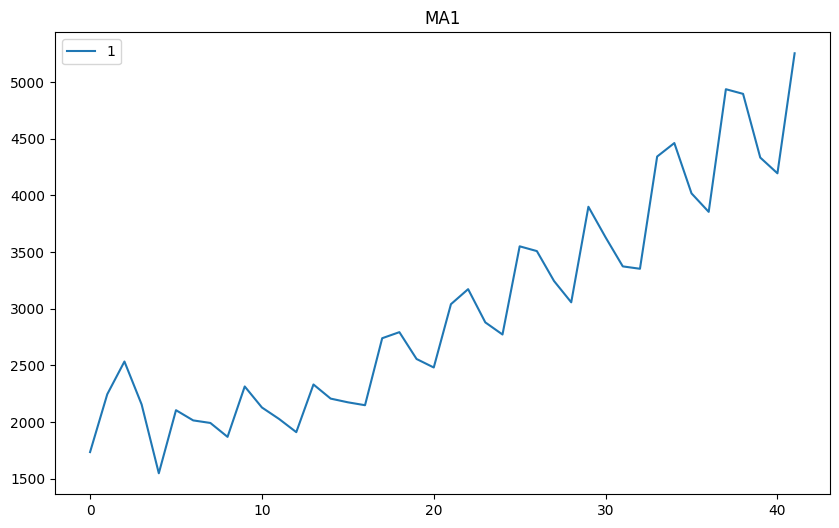

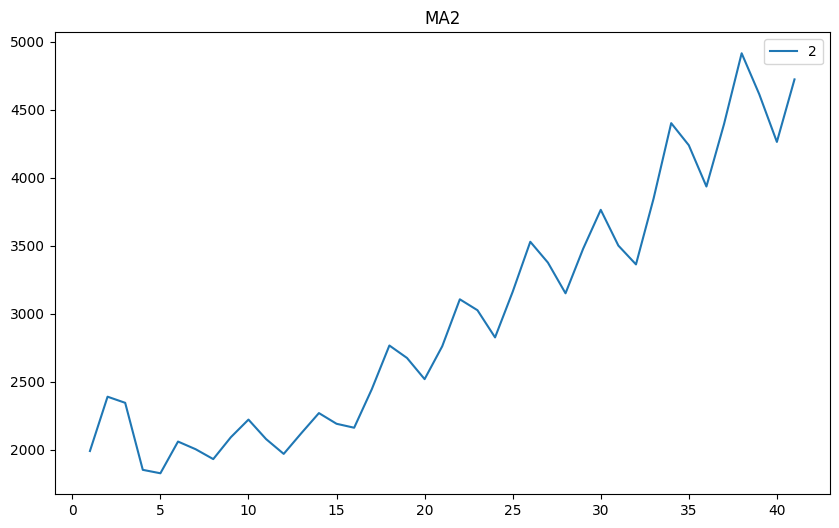

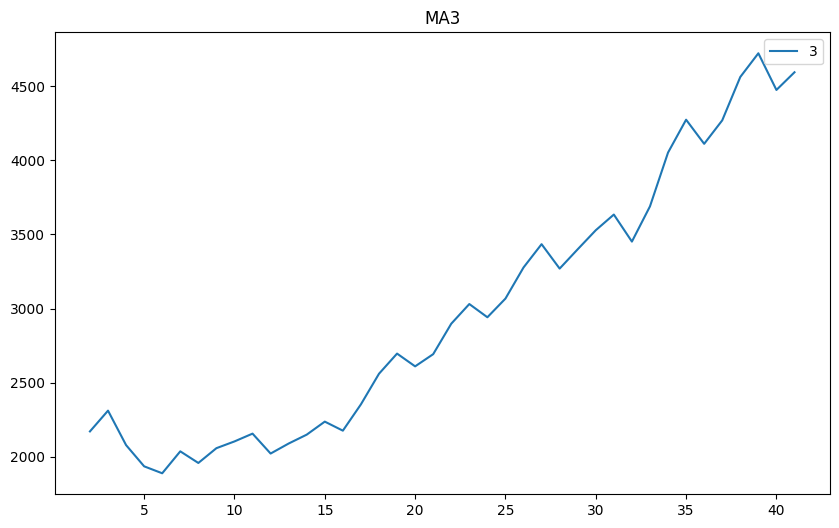

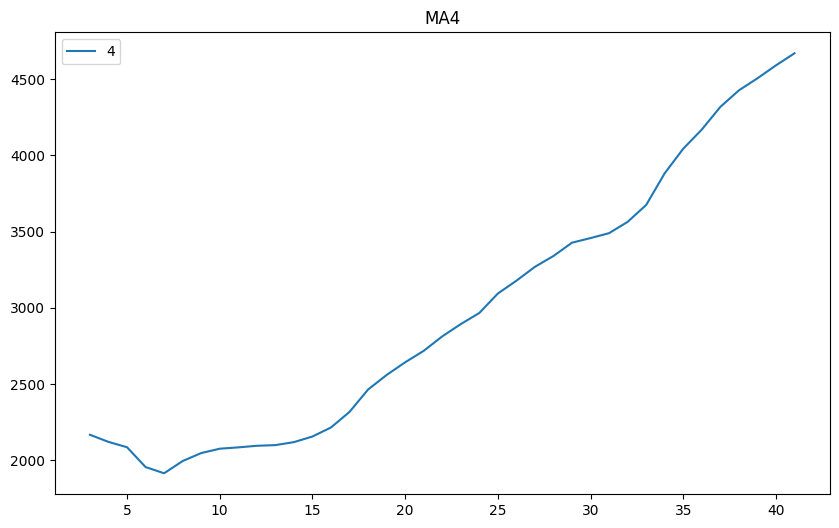

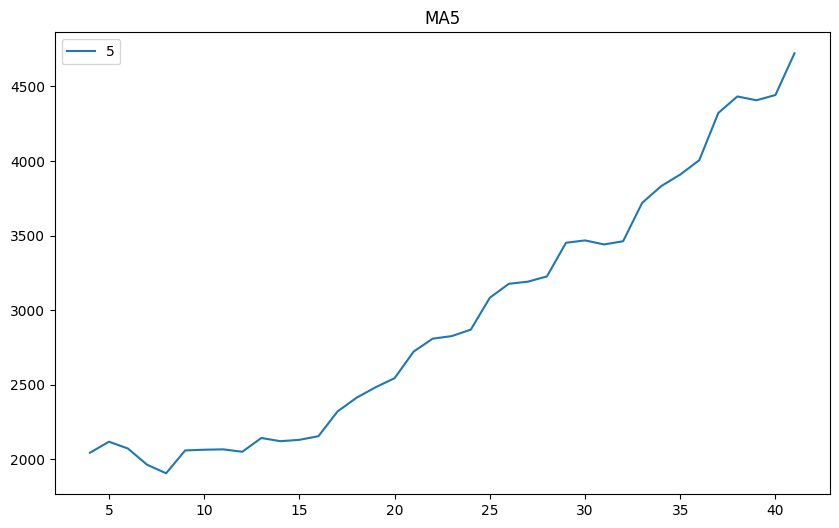

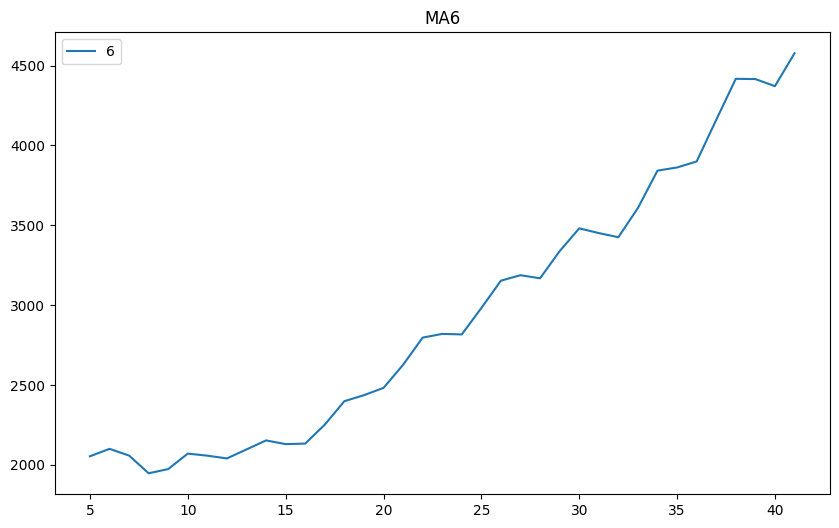

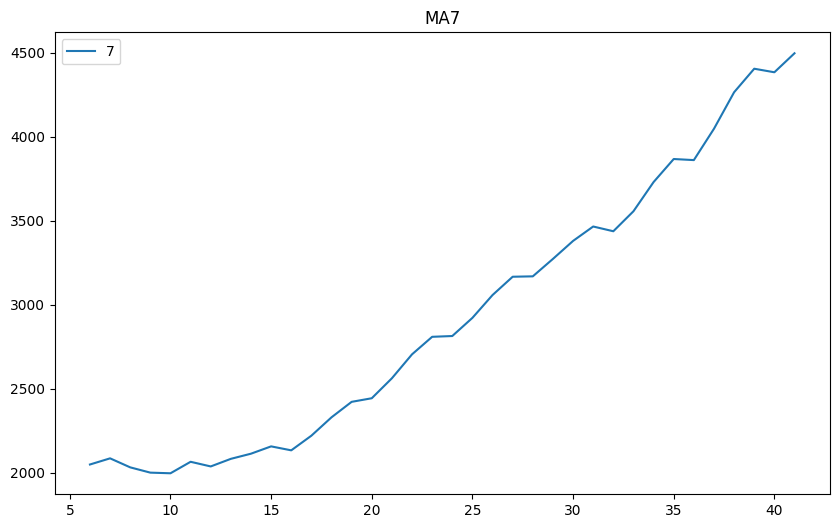

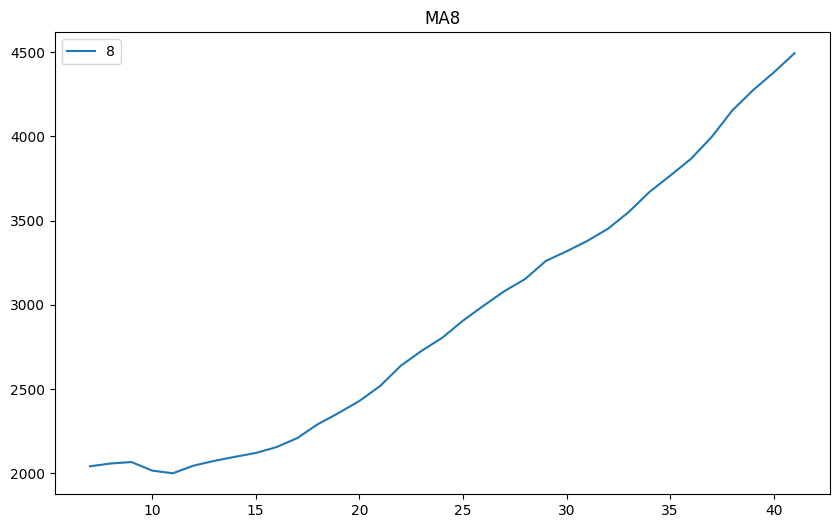

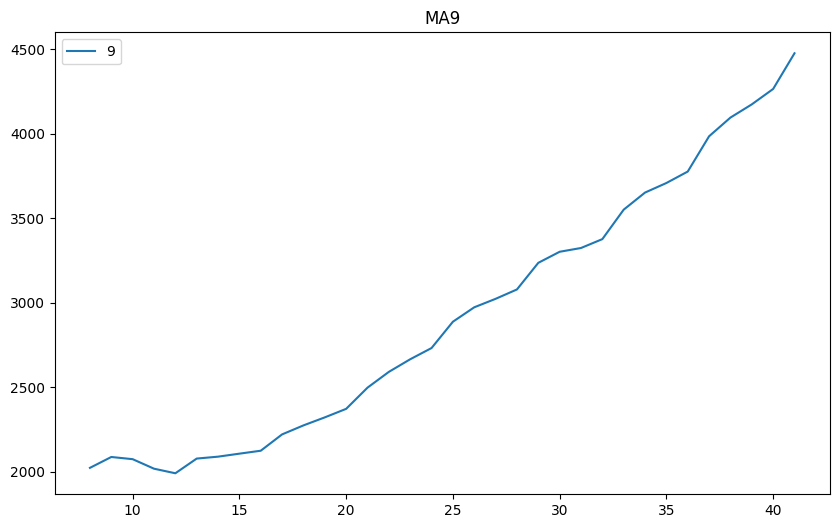

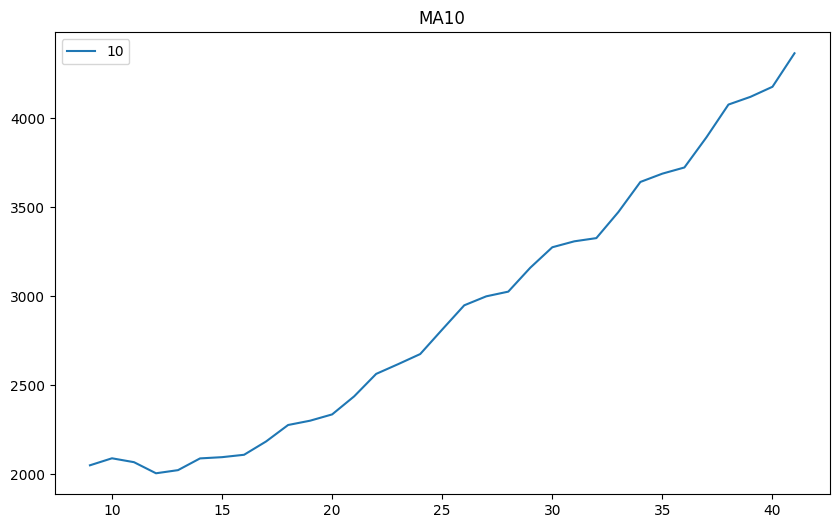

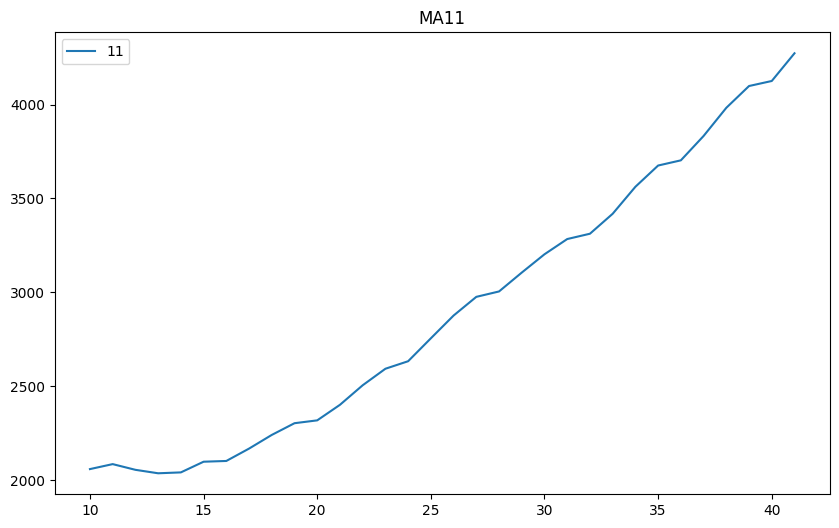

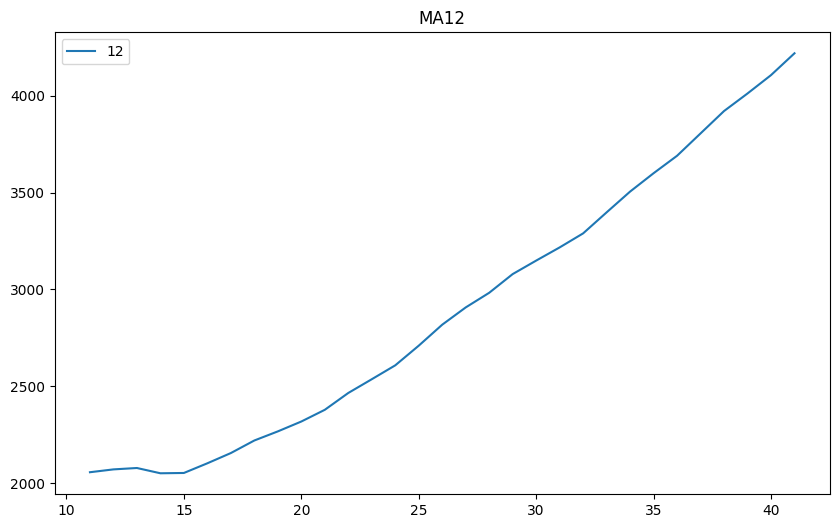

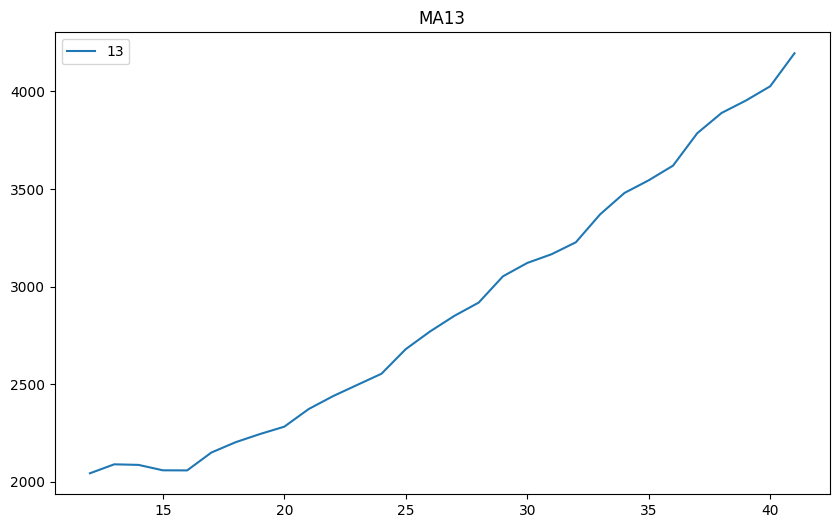

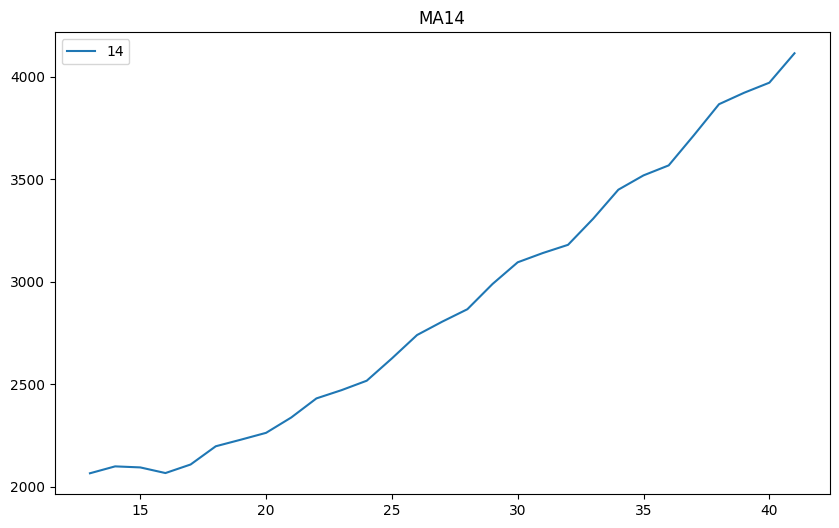

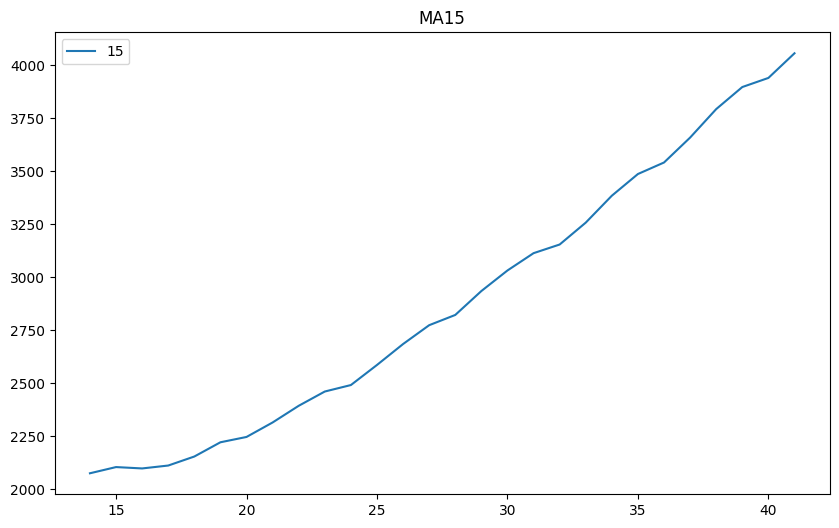

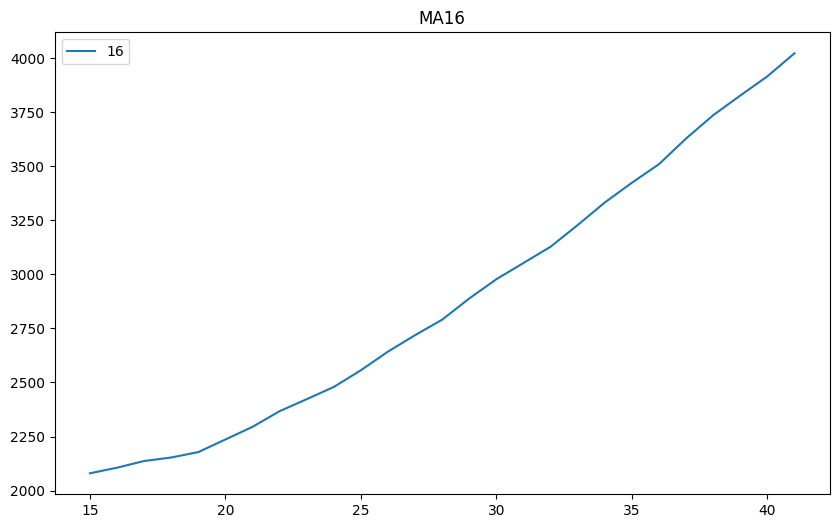

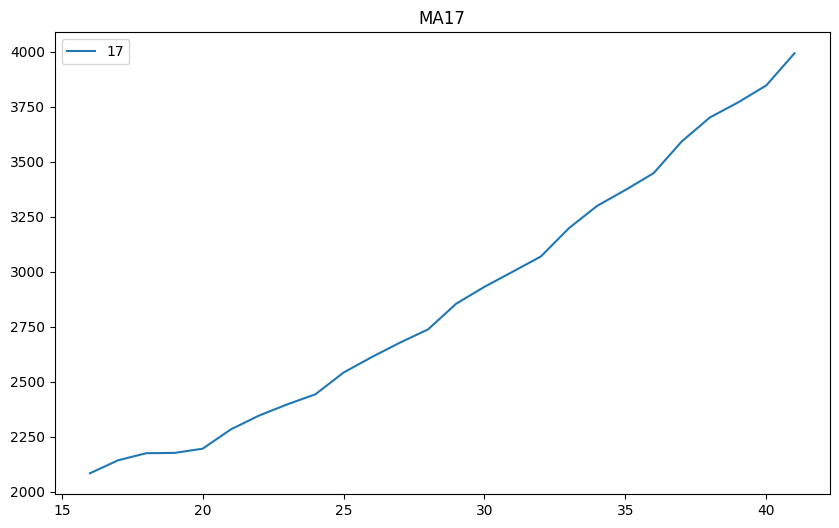

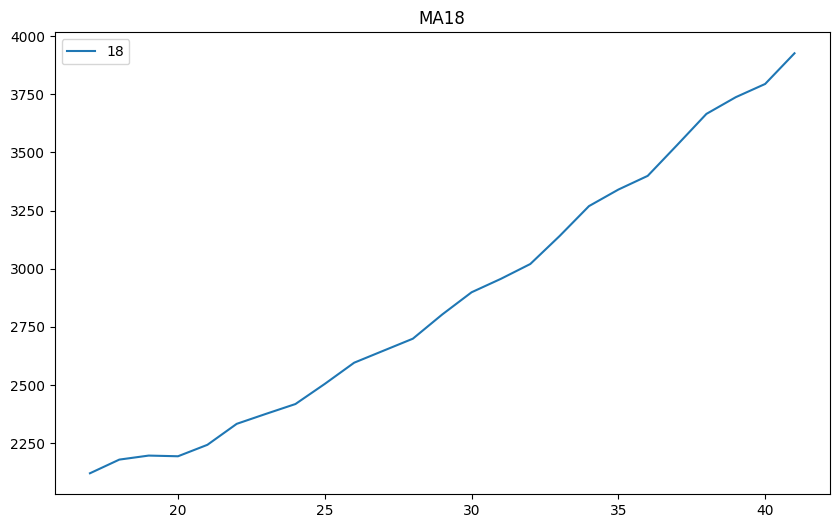

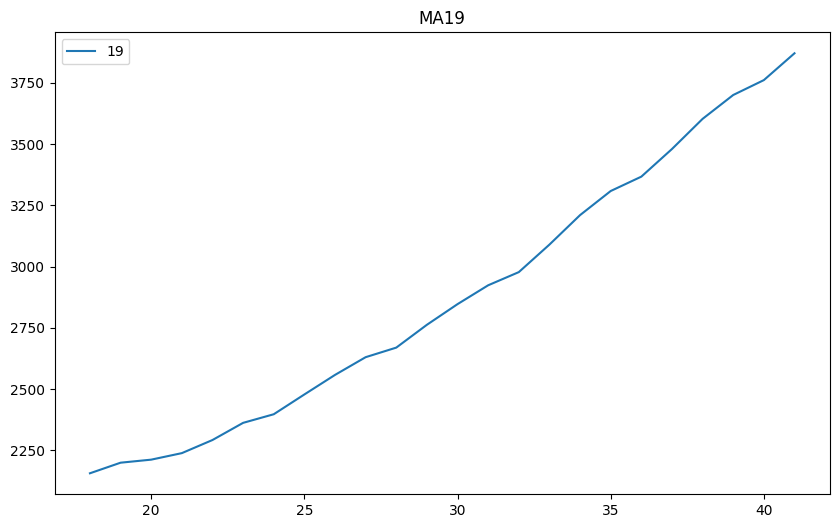

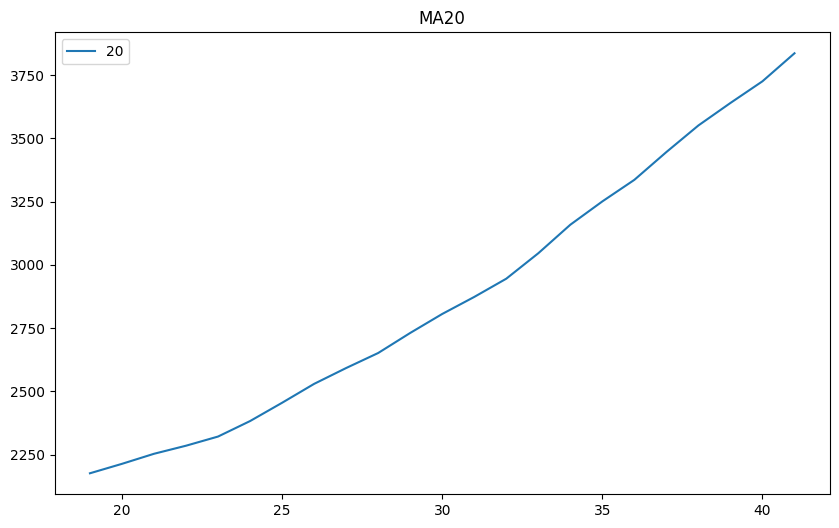

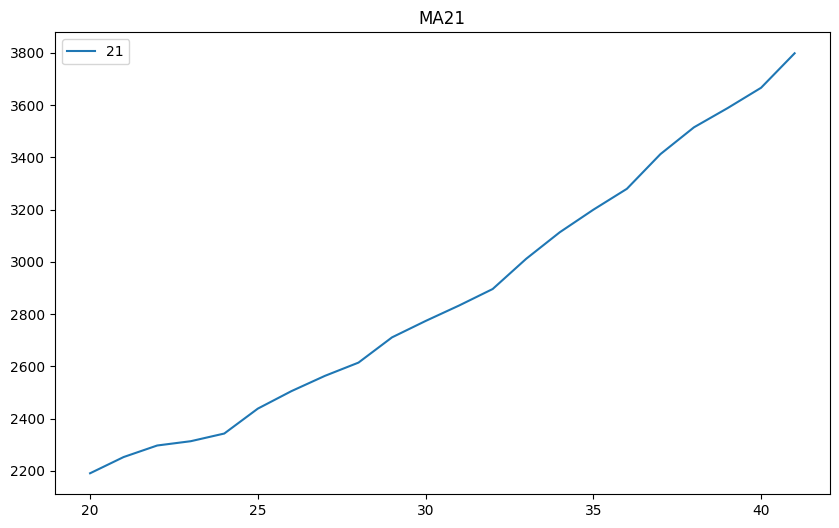

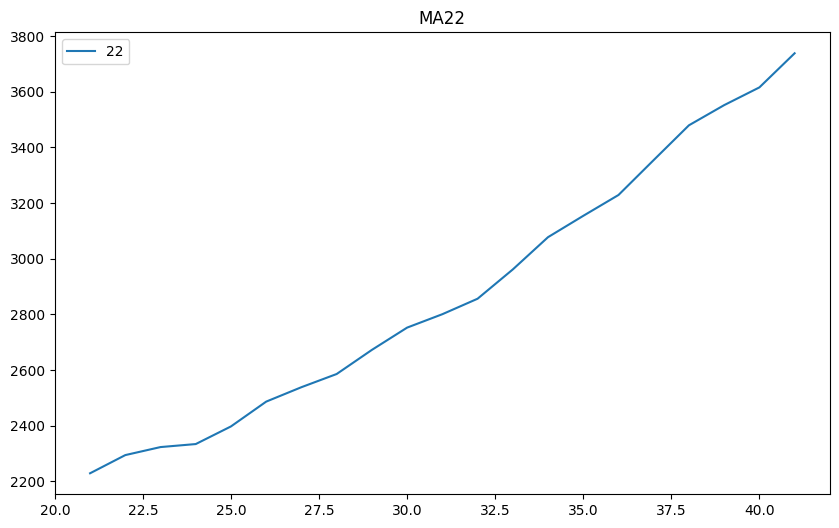

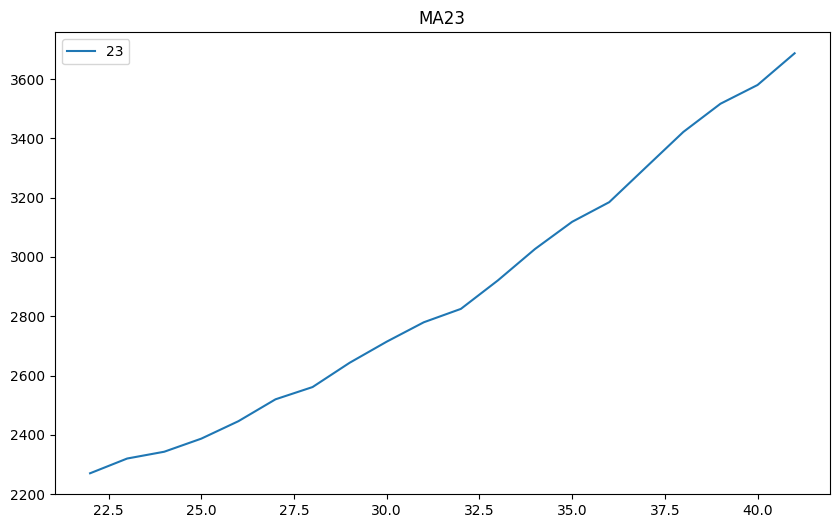

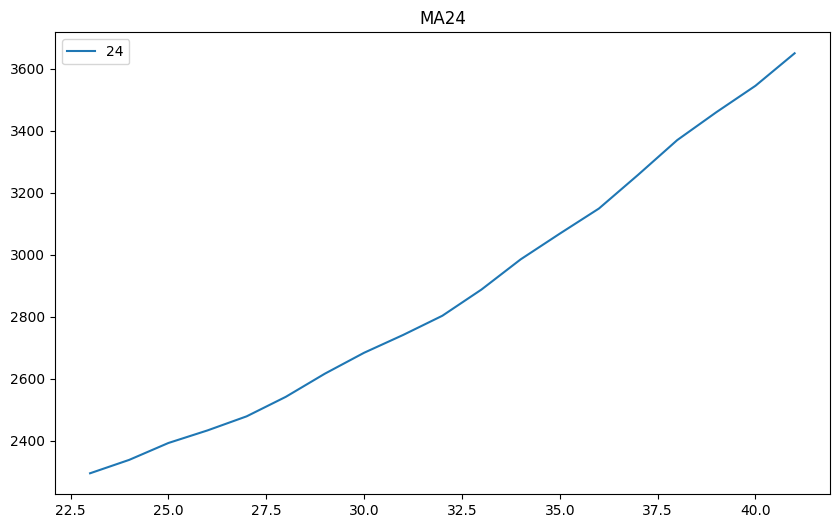

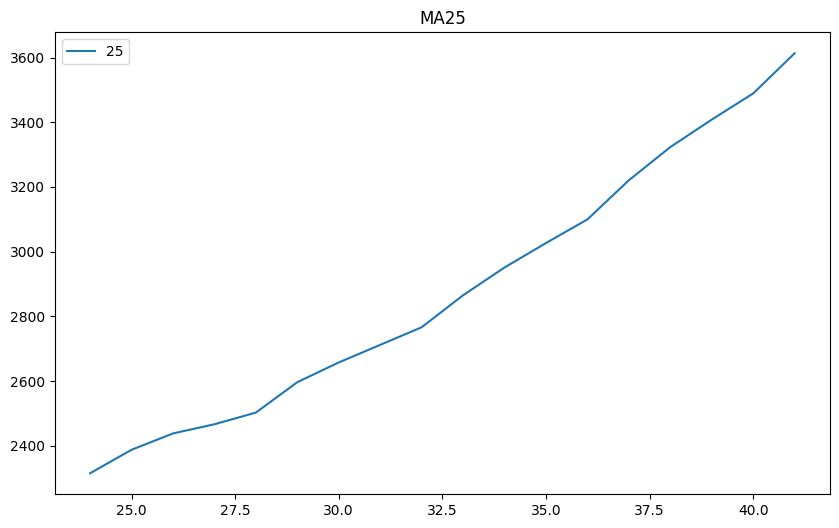

In [9]:
plt.figure(figsize=(10,4))
data.plot()
plt.title("orginal data")

for i in range(1,26,1):
    plt.figure(figsize=(10,6))

    data['Sales'].rolling(i).mean().plot(label=str(i))
    plt.title("MA"+str(i))
    plt.legend(loc='best')
    plt.show()


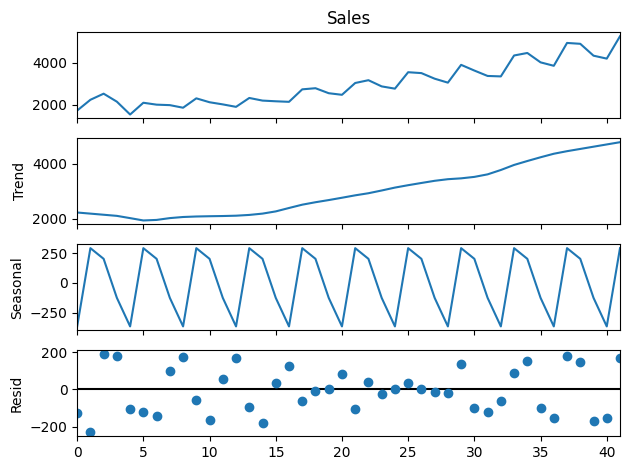

In [17]:
seasonal=seasonal_decompose(data['Sales'],period=4,two_sided=True,extrapolate_trend=1)
seasonal.plot()
plt.show()

In [18]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return(np.mean(temp))

In [19]:
train=data.head(30)
test=data.tail(10)

In [28]:
model=SimpleExpSmoothing(data["Sales"]).fit(smoothing_level=0.3)
pred=model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred,test.Sales)

10.482339702652885

In [29]:
model.forecast(10)

42    4611.678143
43    4611.678143
44    4611.678143
45    4611.678143
46    4611.678143
47    4611.678143
48    4611.678143
49    4611.678143
50    4611.678143
51    4611.678143
dtype: float64

In [21]:
x=np.linspace(0.1,1,20)

for i in x:
    model=SimpleExpSmoothing(data["Sales"]).fit(smoothing_level=i)
    pred=model.predict(start=test.index[0],end=test.index[-1])
    y=MAPE(pred,test.Sales)
    print("Smoothing level",i,"MAPE",y)

Smoothing level 0.1 MAPE 21.024560869296383
Smoothing level 0.1473684210526316 MAPE 15.426191819700108
Smoothing level 0.19473684210526315 MAPE 12.161461238645307
Smoothing level 0.24210526315789474 MAPE 10.70132986334591
Smoothing level 0.2894736842105263 MAPE 10.498882880886592
Smoothing level 0.33684210526315794 MAPE 10.428676405159607
Smoothing level 0.38421052631578945 MAPE 10.469588093552042
Smoothing level 0.43157894736842106 MAPE 10.68020656960044
Smoothing level 0.4789473684210527 MAPE 10.852344611467204
Smoothing level 0.5263157894736842 MAPE 10.98551063511428
Smoothing level 0.5736842105263158 MAPE 11.07826253242691
Smoothing level 0.6210526315789474 MAPE 11.128706990651832
Smoothing level 0.6684210526315789 MAPE 11.134882458162945
Smoothing level 0.7157894736842105 MAPE 11.095083145577794
Smoothing level 0.7631578947368421 MAPE 11.008144349489822
Smoothing level 0.8105263157894737 MAPE 10.873690322154317
Smoothing level 0.8578947368421053 MAPE 10.692336374648562
Smoothing l

In [22]:
model2=Holt(data['Sales']).fit(smoothing_level=0.2,smoothing_slope=0.8)
pred2=model2.predict(start=test.index[0],end=test.index[-1])
MAPE(pred2,test.Sales)

11.423107423334784

In [23]:
u=np.arange(0.1,1,0.1)
z=np.arange(0.1,1,0.1)
l=[]

for i in u:
    for j in z:
        model=Holt(data["Sales"]).fit(smoothing_level=i,smoothing_slope=j)
        pred=model.predict(start=test.index[0],end=test.index[-1])
        f=MAPE(pred,test.Sales)
        print("smoothing level",i,"smoothing slope",j,"==>","MAPE",f)
        l.append((i,j,f))

smoothing level 0.1 smoothing slope 0.1 ==> MAPE 11.110278183012351
smoothing level 0.1 smoothing slope 0.2 ==> MAPE 14.825613878233824
smoothing level 0.1 smoothing slope 0.30000000000000004 ==> MAPE 9.744292301035484
smoothing level 0.1 smoothing slope 0.4 ==> MAPE 10.63000519994375
smoothing level 0.1 smoothing slope 0.5 ==> MAPE 10.78496794032474
smoothing level 0.1 smoothing slope 0.6 ==> MAPE 10.502804869188804
smoothing level 0.1 smoothing slope 0.7000000000000001 ==> MAPE 10.137762967887603
smoothing level 0.1 smoothing slope 0.8 ==> MAPE 10.815987417335787
smoothing level 0.1 smoothing slope 0.9 ==> MAPE 11.447387443864407
smoothing level 0.2 smoothing slope 0.1 ==> MAPE 10.110898255963107
smoothing level 0.2 smoothing slope 0.2 ==> MAPE 10.495155306971427
smoothing level 0.2 smoothing slope 0.30000000000000004 ==> MAPE 10.722228496985124
smoothing level 0.2 smoothing slope 0.4 ==> MAPE 10.750915324471197
smoothing level 0.2 smoothing slope 0.5 ==> MAPE 10.854850233568447
smoo

In [24]:
g=pd.DataFrame(l,columns=["smoothing level","smoothing slope",'score'])
g.sort_values(['score'])

,smoothing level,smoothing slope,score
2,0.1,0.3,9.744292
9,0.2,0.1,10.110898
6,0.1,0.7,10.137763
10,0.2,0.2,10.495155
5,0.1,0.6,10.502805
...,...,...,...
53,0.6,0.9,14.661107
1,0.1,0.2,14.825614
79,0.9,0.8,15.153134
71,0.8,0.9,15.237881


In [25]:
model2=Holt(data['Sales']).fit(smoothing_level=0.1,smoothing_slope=0.3)
pred2=model2.predict(start=test.index[0],end=test.index[-1])
MAPE(pred2,test.Sales)

9.744292301035484

In [26]:
model2.forecast(10)

42    5265.285514
43    5431.049493
44    5596.813471
45    5762.577450
46    5928.341428
47    6094.105406
48    6259.869385
49    6425.633363
50    6591.397342
51    6757.161320
dtype: float64

In [30]:
model3=ExponentialSmoothing(data['Sales'],seasonal_periods=12,trend='add',seasonal='add').fit()
pred=model3.predict(start=test.index[0],end=test.index[-1])
MAPE(pred,test.Sales)

3.8145317194508066

In [33]:
model3.forecast(15)

42    5071.275563
43    4943.958224
44    4904.726309
45    5594.360250
46    5637.462805
47    5381.501032
48    5284.174640
49    6035.740847
50    6117.541521
51    5834.264689
52    5633.219651
53    6450.158658
54    6372.908442
55    6245.591103
56    6206.359189
dtype: float64